In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(['customerID'],axis=1,inplace=True) #drops unneccersay column

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#total charges shoould be a number and not an object
#must convert it to float

In [ ]:
pd.to_numeric(df['TotalCharges'])

<Axes: >

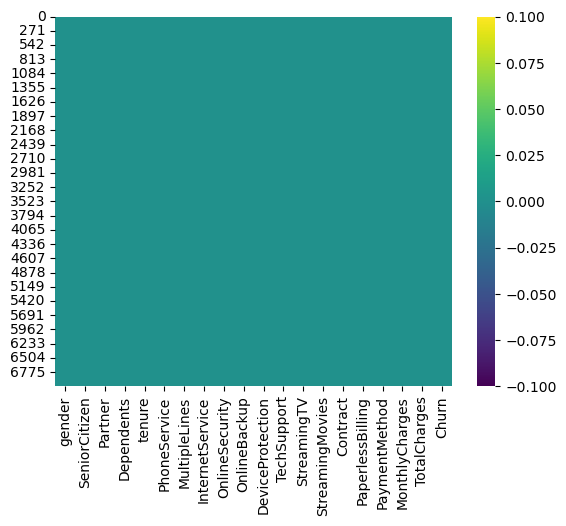

In [7]:
#this means there are some blanks in this column
sns.heatmap(df.isnull(),cmap='viridis')

In [8]:
#this means, we dont have any missing values. The entered values here is just a whitespace.

In [9]:
pd.to_numeric(df['TotalCharges'],errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]
#pd.to_numeric(df['TotalCharges'],errors='coerce').isnull() serves as
#index to total charges values that were set as null by errors=coerce

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
#We gonna drop these 11 rows, since no big deal

In [12]:
df.shape

(7043, 20)

In [13]:
df.TotalCharges.iloc[488]
#we need to remove rows that have this as their totalcharges value

' '

In [14]:
df1 = df[df['TotalCharges'] != ' ']
df1.shape

(7032, 20)

In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
#now we can convert totalcharges to number easily

In [17]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

/var/folders/fk/_w73713n2zg8v7slb7vhljxr0000gn/T/ipykernel_1560/695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [18]:
df1['TotalCharges'].dtype

dtype('float64')

In [19]:
df1['TotalCharges'].values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [20]:
df1[df1['Churn']=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


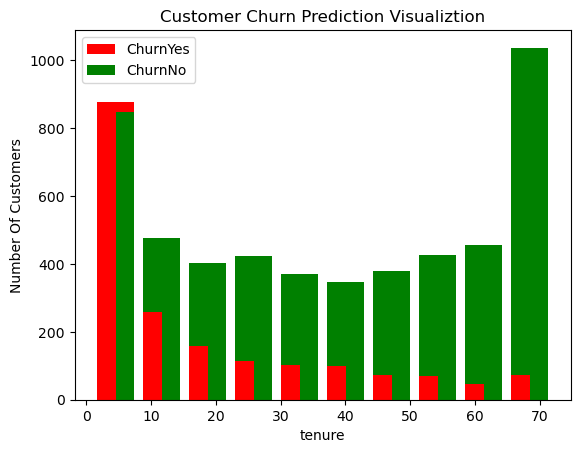

In [21]:
tenure_churn_yes =df1[df1.Churn=='Yes']['tenure']
tenure_churn_no =df1[df1.Churn=='No']['tenure']
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'])
plt.hist([tenure_churn_yes,tenure_churn_no],color=['red','green'],label=['ChurnYes','ChurnNo'])
plt.legend()

In [22]:
# old users generally dont churn basically

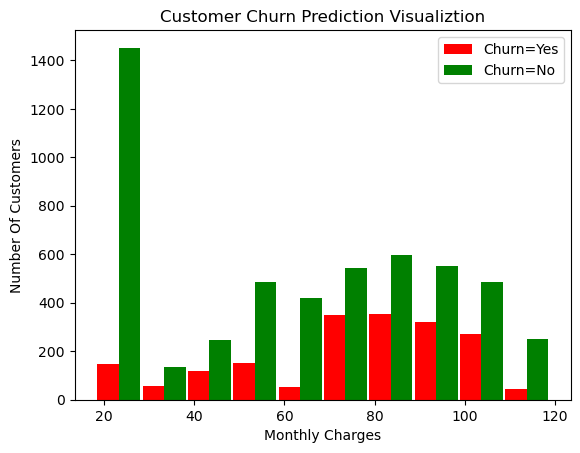

In [23]:
#chart for monthly charges
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [24]:
#mid range customers tends to leave less

In [25]:
def unique_vals(df):
    for col in df.columns:
        if df[col].dtype == 'O':
            print(col,": ",df[col].unique())

In [26]:
unique_vals(df1)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [27]:
#no phone/internet service = no only

In [28]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

/var/folders/fk/_w73713n2zg8v7slb7vhljxr0000gn/T/ipykernel_1560/3221983738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)
/var/folders/fk/_w73713n2zg8v7slb7vhljxr0000gn/T/ipykernel_1560/3221983738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [29]:
unique_vals(df1)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes']
OnlineBackup :  ['Yes' 'No']
DeviceProtection :  ['No' 'Yes']
TechSupport :  ['No' 'Yes']
StreamingTV :  ['No' 'Yes']
StreamingMovies :  ['No' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [30]:
#we eed to convert all yes no to 1 0

In [31]:
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
              'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
              'StreamingMovies','PaperlessBilling','Churn']

In [32]:
for col in yes_no_cols:
    df1[col].replace('Yes',1,inplace=True)
    df1[col].replace('No',0,inplace=True)

/var/folders/fk/_w73713n2zg8v7slb7vhljxr0000gn/T/ipykernel_1560/1578880922.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace('Yes',1,inplace=True)
/var/folders/fk/_w73713n2zg8v7slb7vhljxr0000gn/T/ipykernel_1560/1578880922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace('Yes',1,inplace=True)
/var/folders/

In [33]:
unique_vals(df1)
#yes no columns aint objects no more

gender :  ['Female' 'Male']
InternetService :  ['DSL' 'Fiber optic' 'No']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [34]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [35]:
df1['gender'].replace('Female',1,inplace=True)
df1['gender'].replace('Male',0,inplace=True)


/var/folders/fk/_w73713n2zg8v7slb7vhljxr0000gn/T/ipykernel_1560/3676012290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace('Female',1,inplace=True)
/var/folders/fk/_w73713n2zg8v7slb7vhljxr0000gn/T/ipykernel_1560/3676012290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace('Female',1,inplace=Tru

In [36]:
df1.gender.unique()

array([1, 0])

In [37]:
unique_vals(df1)

InternetService :  ['DSL' 'Fiber optic' 'No']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


One hot encoding for categorical columns

In [38]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [40]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2572,1,0,1,0,71,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False
141,1,0,0,0,8,1,1,1,0,0,...,True,False,False,True,False,False,False,False,True,False
4808,1,0,0,0,54,1,0,1,0,1,...,True,False,False,False,False,True,False,False,True,False
608,0,0,1,1,72,1,1,1,1,1,...,False,True,False,False,False,True,True,False,False,False
6753,1,0,1,1,56,1,1,1,1,0,...,True,False,False,False,True,False,True,False,False,False


In [41]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [42]:
#Feature Scaling convert 0-1

In [43]:
fs_cols = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[fs_cols] = scaler.fit_transform(df2[fs_cols])

In [44]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [45]:
#now we do test train split

In [46]:
X = df2.drop(['Churn'],axis=1)
y = testLabels = df2.Churn.astype(np.float32)

In [50]:
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
Note: you may need to restart the kernel to use updated packages.


Churn
0.0    5163
1.0    5163
Name: count, dtype: int64

In [52]:
X_sm.shape , y_sm.shape

((10326, 26), (10326,))

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [54]:
X_train.shape

(8260, 26)

In [55]:
y_train.shape

(8260,)

In [56]:
X_test.shape

(2066, 26)

In [57]:
y_test.shape

(2066,)

In [130]:
len(X_train.columns)
#26 features, thus 26 input neurons

26

In [131]:
#Now we create ANN

In [58]:

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

In [84]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_train = X_train.astype('float32')
    y_train = y_train.astype('int32')
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(26,)),
        keras.layers.Dense(32, activation='tanh'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(64, activation='tanh'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(128, activation='tanh'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    print(X_train.shape)
    print(y_train.shape)
    print("working")

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    model.summary()
    print(f"after summary")
    print(X_train.shape)
    print(y_train.shape)
    if weights == -1:
        print(f"Applying class weights: {weights}")
        model.fit(X_train, y_train, epochs=100)
    else:
        print(f"Applying class weights: {weights}")
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
        print(X_train.shape)
        print(y_train.shape)

    print(model.evaluate(X_test, y_test))
    print(f"after evaluate")
    print(X_train.shape)
    print(y_train.shape)
    print("working")
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))
    print(f"after report")
    print(X_train.shape)
    print(y_train.shape)
    return model

In [86]:
weights = {1:5.0, 0:5.0}
print(type(weights))
model = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy',weights)

<class 'dict'>
(8260, 26)
(8260,)
working
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 26)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                864       
                                                                 
 dropout_24 (Dropout)        (None, 32)                0         
                                                                 
 dense_33 (Dense)            (None, 64)                2112      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 128)               8320      
                                                                 
 dropout_26 

In [82]:

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
X_test = X_test.astype('float32')
y_test = y_test.astype('int32')
model.evaluate(X_test,y_test)

65/65 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.8141


[0.42463594675064087, 0.8141335844993591]

In [88]:
prediction = model.predict(X_test)
prediction[5]

65/65 [==============================] - 0s 1ms/step


array([0.14040637], dtype=float32)

In [90]:
y_test[5]

0

In [91]:
prediction[10]

array([0.00783162], dtype=float32)

In [92]:
y_test[10]

0

In [93]:
y_pred = []
for i in prediction:
    if(i>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1033
           1       0.77      0.86      0.82      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



Text(50.722222222222214, 0.5, 'Truth')

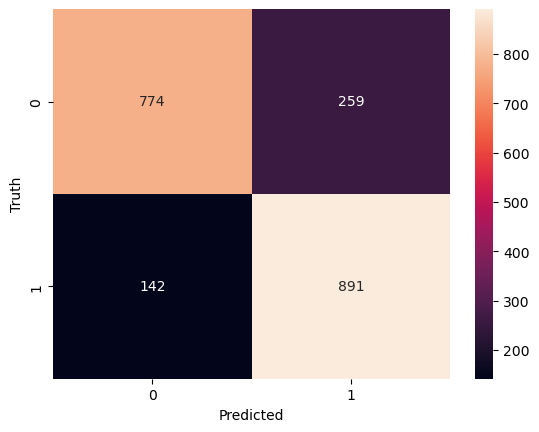

In [95]:

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
